# Analysis of Titanic's passenger data

<h4>By Trevor Cook</h4>

The purpose of this project is to go through the data analysis process while using passenger data of the Titanic. By going through this process, I will have organized the data by combining the csv files into a single, readable dataFrame. After looking at the data, I will be able to come up with questions that I find interesting and would like to answer using my newly learned programming tools! Finally, I will draw up visualizations to help support these questions and provide a conclusion of my findings. 

The Titanic passenger data provides us with information about each passenger, such as their age, gender, class, their port of embarkment, and if they survived or not. The questions that I'm interested in finding out is whether these factors had a significant influence on a passengers' chances of survival, and if so, which ones were the most important. 

The characteristics that I think will have the most significance on a passengers' chances of success are:
<li>Class</li>
<li>Age</li>
<li>Sex</li>
<li>Siblings or spouses</li>
<li>Parents or children</li>



<h4>1. Import and clean up Titanic data </h4>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic1 = 'train.csv'
titanic2 = 'test.csv'
titanic2_survived = 'gendermodel.csv'

titanic1_df = pd.read_csv(titanic1)
titanic2_df = pd.read_csv(titanic2)
titanic2_survived_df = pd.read_csv(titanic2_survived)

In [3]:
# Add the missing 'Survived' column to test.csv
titanic2_merge_df = titanic2_df.merge(titanic2_survived_df, on=['PassengerId'], how='inner')

In [4]:
# Combine both halves of the Titanic data into one dataFrame
frames = [titanic1_df, titanic2_merge_df]
titanic_df = pd.concat(frames)

In [65]:
titanic_df.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Count
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1


In [6]:
# Shows how many items are in each column, and what type of data it is.
# This will give us a better idea of how many NaNs there are.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [7]:
# Shows the overall survival rate of the data
titanic_df['Survived'].mean()

0.37738731856378915

<h4>2. Analyze data and create visualizations: Single-variable explorations</h4>

<h5>a) Fare Prices</h5>

In [68]:
titanic_fares = titanic_df['Fare']

In [69]:
titanic_fares.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

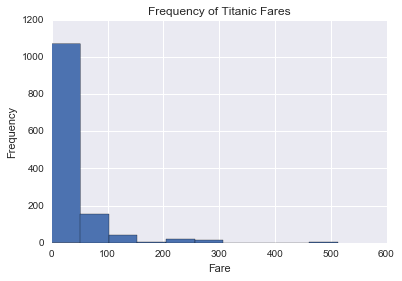

In [72]:
titanic_fares.plot(kind='hist')
plt.title('Frequency of Titanic Fares')
plt.xlabel('Fare')

In [81]:
# Investigate which passengers were on board for free
titanic_df.where(titanic_df['Fare'] < 1).dropna()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Count
263,40.0,B94,S,0.0,"Harrison, Mr. William",0.0,264.0,1.0,male,0.0,0.0,112059,1.0
806,39.0,A36,S,0.0,"Andrews, Mr. Thomas Jr",0.0,807.0,1.0,male,0.0,0.0,112050,1.0
372,49.0,B52 B54 B56,S,0.0,"Ismay, Mr. Joseph Bruce",0.0,1264.0,1.0,male,0.0,0.0,112058,1.0


In [88]:
# Investigate the top paying passengers
titanic_df.where(titanic_df['Fare'] > 300).dropna()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Count
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1.0,680.0,1.0,male,0.0,1.0,PC 17755,1.0
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0.0,738.0,1.0,male,0.0,1.0,PC 17755,1.0
343,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1.0,1235.0,1.0,female,0.0,1.0,PC 17755,1.0


<h5>b) Passenger Ages</h5>

In [73]:
titanic_ages = titanic_df['Age']

In [74]:
titanic_ages.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

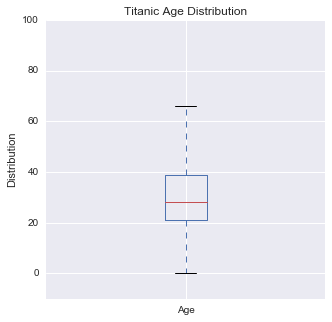

In [95]:
titanic_ages.plot(kind='box', figsize=(5, 5), ylim=(-10, 100))
plt.title('Titanic Age Distribution')
plt.ylabel('Distribution')

In [94]:
# Investigate the youngest passengers
titanic_df.where(titanic_df['Age'] < 1).dropna()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Count
305,0.92,C22 C26,S,151.55,"Allison, Master. Hudson Trevor",2.0,306.0,1.0,male,1.0,1.0,113781,1.0


<h4>3. Analyze data and create visualizations: Multiple-variable explorations</h4>

<h5>a) Survival rate based on class</h5>

In [14]:
grouped_class = titanic_df.groupby('Pclass')['Survived']

In [15]:
grouped_class_mean = grouped_class.mean()
print grouped_class_mean


Pclass
1    0.575851
2    0.422383
3    0.269394
Name: Survived, dtype: float64


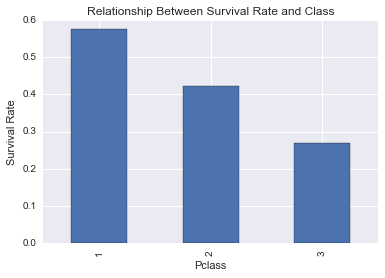

In [16]:
grouped_class_mean.plot(kind='bar')
plt.title('Relationship Between Survival Rate and Class')
plt.ylabel('Survival Rate')


<h5>b) Comparing class survival rate to number of passengers in each class</h5>

In [17]:
titanic_df['Count'] = 1
grouped_class_sum = titanic_df.groupby('Pclass')['Count'].sum()

In [18]:
grouped_class_mean_sum = pd.concat([grouped_class_mean, grouped_class_sum], axis=1)

In [19]:
grouped_class_mean_sum

,Survived,Count
Pclass,,
1,0.575851,323
2,0.422383,277
3,0.269394,709


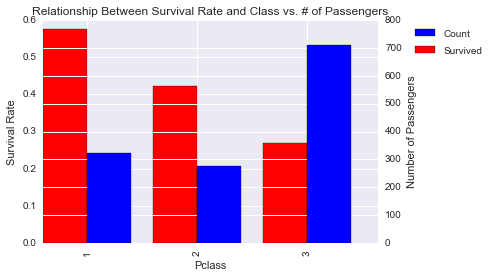

In [20]:
# Reference: 
# http://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis
fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

grouped_class_mean_sum['Survived'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
grouped_class_mean_sum['Count'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Survival Rate')
ax2.set_ylabel('Number of Passengers')

ax.legend(bbox_to_anchor=(1.1, .9), loc=2, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(1.1, .9), loc=3, borderaxespad=0.)

plt.title('Relationship Between Survival Rate and Class vs. # of Passengers')

plt.xlim(-.4)

plt.show()

<h5>c) Survival rate based on sex</h5>

In [21]:
grouped_sex = titanic_df.groupby('Sex')['Survived']

In [22]:
grouped_sex_mean = grouped_sex.mean()
print grouped_sex_mean

Sex
female    0.82618
male      0.12930
Name: Survived, dtype: float64


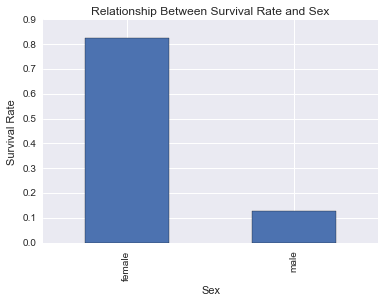

In [23]:
grouped_sex_mean.plot(kind='bar')
plt.title('Relationship Between Survival Rate and Sex')
plt.ylabel('Survival Rate')

<h5>d) Survival rate based on age group</h5>

In [24]:
def age_group(data):
    '''This function takes in data as input, and returns a string to classify this data as output.'''
    if data < 15:
        return '[0, 15[' 
    elif (15 < data < 30):
        return '[15, 30['
    elif (30 < data < 45):
        return '[30, 45['
    elif (45 < data < 60):
        return '[45, 60['
    else:
        return ']60+'

In [25]:
# Creates a df that excludes rows with NaN values in the 'Age' column
titanic_age_df = titanic_df[np.isfinite(titanic_df['Age'])]

In [26]:
# We can see that there are 1046 passengers with 'Age' information provided
titanic_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 415
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          272 non-null object
Embarked       1044 non-null object
Fare           1045 non-null float64
Name           1046 non-null object
Parch          1046 non-null int64
PassengerId    1046 non-null int64
Pclass         1046 non-null int64
Sex            1046 non-null object
SibSp          1046 non-null int64
Survived       1046 non-null int64
Ticket         1046 non-null object
Count          1046 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 114.4+ KB


In [27]:
# Convert 'Age' type to int
titanic_age_df['Age'] = titanic_age_df['Age'].astype(int)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [28]:
# Creates a new column that separates passengers by age group
titanic_age_df['AgeGroup'] = titanic_age_df['Age'].apply(age_group)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [87]:
titanic_age_df.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Count,AgeGroup
0,22,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1,"[15, 30["
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1,"[30, 45["
2,26,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,"[15, 30["


In [30]:
grouped_agegroup = titanic_age_df.groupby('AgeGroup')['Survived'].mean()

In [31]:
grouped_agegroup

AgeGroup
[0, 15[     0.522936
[15, 30[    0.363436
[30, 45[    0.393822
[45, 60[    0.407080
]60+        0.423423
Name: Survived, dtype: float64

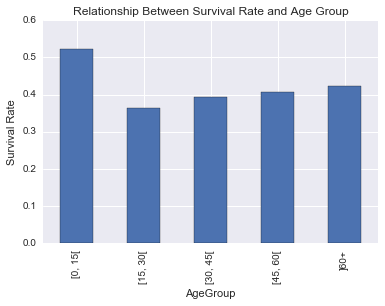

In [32]:
grouped_agegroup.plot(kind='bar')
plt.title('Relationship Between Survival Rate and Age Group')
plt.ylabel('Survival Rate')

<h5>e) Survival rate based on age group and gender</h5>

In [33]:
grouped_agegroup_sex = titanic_age_df.groupby(['AgeGroup', 'Sex'])['Survived'].mean()

In [34]:
grouped_agegroup_sex

AgeGroup  Sex   
[0, 15[   female    0.705882
          male      0.362069
[15, 30[  female    0.833333
          male      0.102740
[30, 45[  female    0.862069
          male      0.156977
[45, 60[  female    0.902439
          male      0.125000
]60+      female    0.872340
          male      0.093750
Name: Survived, dtype: float64

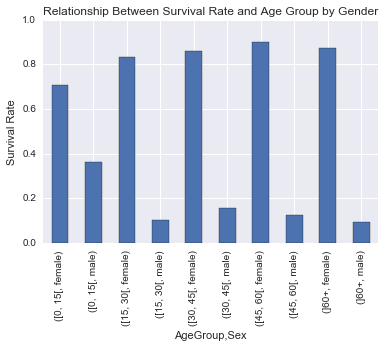

In [35]:
grouped_agegroup_sex.plot(kind='bar')
plt.title('Relationship Between Survival Rate and Age Group by Gender')
plt.ylabel('Survival Rate')

<h5>f) Survival rate based on number of parents and children</h5>

In [36]:
grouped_parch = titanic_df.groupby('Parch')['Survived']

In [37]:
grouped_parch_mean = grouped_parch.mean()
print grouped_parch_mean

Parch
0    0.331337
1    0.547059
2    0.530973
3    0.625000
4    0.333333
5    0.166667
6    0.000000
9    0.500000
Name: Survived, dtype: float64


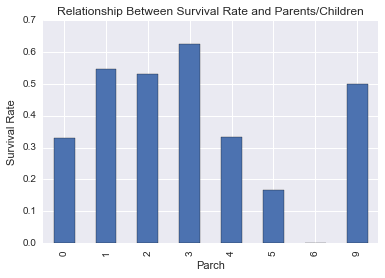

In [38]:
grouped_parch_mean.plot(kind='bar')
plt.title('Relationship Between Survival Rate and Parents/Children')
plt.ylabel('Survival Rate')

<h5>f) Survival rate based on number of siblings and spouses</h5>

In [39]:
grouped_sibsp = titanic_df.groupby('SibSp')['Survived']

In [40]:
grouped_sibsp_mean = grouped_sibsp.mean()
print grouped_sibsp_mean

SibSp
0    0.334456
1    0.520376
2    0.452381
3    0.250000
4    0.181818
5    0.166667
8    0.111111
Name: Survived, dtype: float64


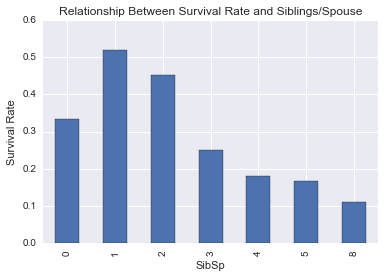

In [41]:
grouped_sibsp_mean.plot(kind='bar')
plt.title('Relationship Between Survival Rate and Siblings/Spouse')
plt.ylabel('Survival Rate')

<h4>4. Conclusion</h4>

By grouping together certain data from the titanic passenger file, I was able to compare passenger characteristics to their effect on survival rates. I chose to use the mean survival rate as a comparison because this data is separated into 0s and 1s (0 = didn't survive, 1 = survived). So, for example, in a sample of two, if one survived while the other didn't, there is a 50% chance of survival. Comparing passenger characteristics to the mean survival rate will give me a percentage of how likely they are to survive based on this information. 

The charts above show that some of the most significant indicators of survival on the Tatanic were gender and class. A woman, regardless of class, had an 82.6% chance of survival, compared to a man's slim 12.9% chance. Class was also a distinguishing factor: the upper class enjoyed a 57.8% chance of survival, while the lower class had 26.9%.

Surprisingly, children on the Titanic had lower than expected survival rates. Although children below the age of 15 had the highest survival rate (52.3%), the other groups of ages were not far behind. Young female children were at the lowest end of the spectrum, compared to other age groups of females. 

There were several limitations to this analysis on Titanic passenger data. One variable that should be taken into consideration is that the data is filled with missing values. This dataset contains information on 1309 different passengers. Many of the columns describing these passengers have missing values, such as the 'Age' identifier, which only carries data on 1046 passengers. Throughout my investigation, 'Age' was one of characteristics that I analyzed as having an affect on Titanic passenger survival rate. I decided to handle these missing values my omitting them from their respective visualizations. For this reason, my analysis on Titanic's survival rate based on age may be inacurrate. 

Another incident that should be noted is that three of the passengers in this data had a fare price of 0. It seemed strange that these individuals were able to board the Titanic on first class, free of charge. It is unlikely that these passengers were employees of the ship, as there are only three of them (although this would be an interesting variable to include in the dataset). There is not enough information to determine the reason behind the free fare of these three passengers.